# [George McNinch](http://gmcninch.math.tufts.edu) Math 87 - Spring 2025

# Week 11

# Monte-Carlo methods
--------------

Monte-Carlo integration
=======================

We want to consider examples for which studying random processes can help solve apparently non-random problems!

Here is a first example:

Example: Buffon's Needle
-------------------------

Consider an array of parallel lines (say, on a piece of paper -- though we'll consider the grid to "go on forever").

We suppose that the distance between each pair of consecutive parallel lines is constant. In fact, we normalize
our measures and suppose that this distance is 1 ``unit``.

Now consider a needle also of length 1 ``unit``. We drop this needle on the page and wonder: with what probability does it cross one of the lines??

Graphical demo
---------------

In [1]:
import numpy as np
import matplotlib.pyplot as mp


from numpy.random import default_rng
rng = default_rng()

def needle_drop(ax):
    x0 = rng.random()*5.5 - .5
    y0 = rng.random()*5.5 - .5
    theta = np.pi*rng.random()
        
    x = np.array([x0,x0]) + (1/2)*np.array([np.cos(theta),(-1)*np.cos(theta)])
    y = np.array([y0,y0]) + (1/2)*np.array([np.sin(theta),(-1)*np.sin(theta)])
    
    ax.plot(x,y)    


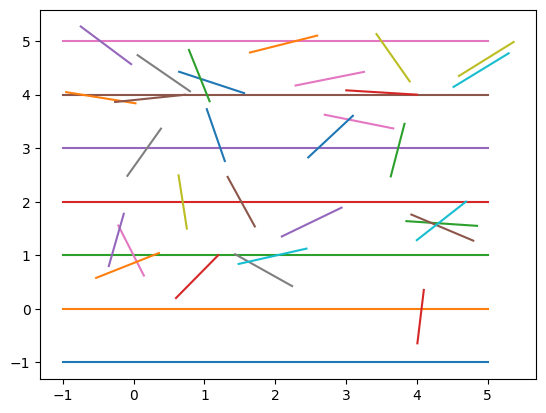

In [2]:

def needle_demo(n=20):
    fig,ax = mp.subplots()

    x = np.linspace(-1,5,5)

    def hline(ht):
        ax.plot(x,np.array([ht for i in x]))

    for i in range(-1,6):
        hline(i)
        
    for i in range(n):
        needle_drop(ax)
        
needle_demo(n=30)

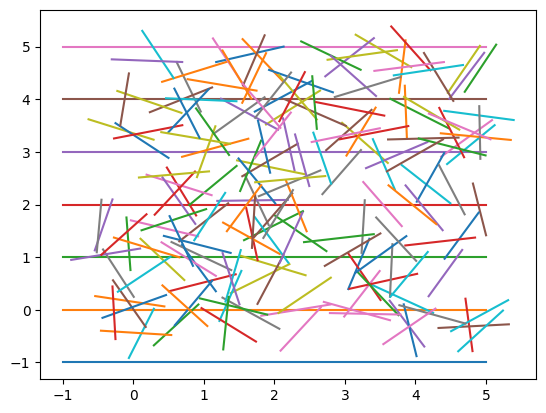

In [4]:
needle_demo(n=175)


Random variables
----------------

If you inspect the code for the demo, you'll see that for each needle, we've randomly
chosen the midpoint of the needle, and the angle $\theta$ that the needle makes with one of the parallel lines.

The coordinates of the midpoint are important for drawing the diagram, but for the purposes
of counting the needles which cross the lines, the important stastic is the *distance* of the midpoint from the nearest line.

For a needle drop, the distance $D$ from the nearest line is a uniformly distributed random variable assuming the values $0 \le D \le \dfrac{1}{2}$.

And the angle $\theta$ that the needle makes with one of parallel lines is a uniformly distributed random variable assuming the values $0 \le \theta \le \pi$.


Uniformly distributed ??
------------------------
We need to understand the term *uniformly distributed*, at least in this example.

To say that $D$ is uniformly distributed means that for  $0 \le a < b \le \dfrac{1}{2}$ we have

$$P(a \le D \le b) = \int_a^b 2dx$$

which guarantees that $P\left(0 < D < \dfrac{1}{2}\right) = 1$.

And to say that $\theta$ is uniformly distributed means that for $0 \le \alpha < \beta \le \pi$ we have

$$P(\alpha < \theta \le \beta) = \dfrac{1}{\pi}\int_\alpha^\beta d\theta$$

which guarantees that 

$$P\left( 0 \le \theta \le \pi \right) = 1.$$




Roughly speaking, a random variable $Z$ is "uniformly distributed" means that the probability distribution function is constant on the "relevant interval" $[A,B]$, and the constant is chosen to guaranteed that the probability satisfies $P(A\le Z \le B) = 1$.

Independent random variables
-----------------------------

For our needle drop, we assume that the position is *independent* from the angle.

A consequence of this independence is that we can calculate the probability that $(D,\theta)$ satisfies certain conditions by using a double-integral.

Here is an easy example: Consider the conditions: $\theta$ satisfies $0 \le \theta \le \dfrac{\pi}{4}$ and $D$ satisfies $0 \le D \le \dfrac{1}{4}$. With what probability does a random needle satisfy this condition??

Well, since $D$ and $\theta$ are independent, we can calculate this using

$$P\left(0 \le D \le \dfrac{1}{4}, 0 \le \theta \le \dfrac{\pi}{4}\right) = 
\dfrac{2}{\pi}\int_0^{1/4} \int_0^{\pi/4}  d\theta dD  = \dfrac{1}{8}$$

Condition for a needle crossing
-------------------------------

Let's look at a diagram where $D = \dfrac{1}{2}$.

We consider $\theta = \dfrac{\pi}{4}$ and $\dfrac{\pi}{7}$. In the first case,
we see that the needle will cross the line, and in the second case it will not cross.

In [5]:

theta1 = np.pi/4
theta2 = np.pi/7


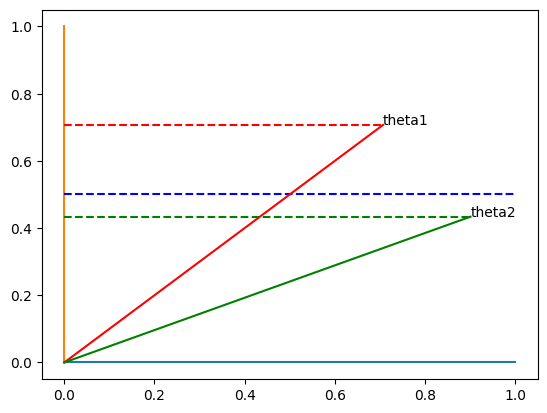

In [6]:
fig,ax = mp.subplots()
ax.plot([0,1],[0,0])
ax.plot([0,0],[0,1])

ax.plot([0,1],[.5,.5],"b--")

def f(theta,col,var):
    ax.plot([0,np.cos(theta)],[0,np.sin(theta)],col)
    ax.plot([0,np.cos(theta)],[np.sin(theta),np.sin(theta)],col+"--")
    ax.annotate(var,(np.cos(theta),np.sin(theta)))
    
f(theta1,"r","theta1")
f(theta2,"g","theta2")

To analyze the general situation,
suppose that the needle drops with midpoint $(x_0,y_0)$ at a distance $0 < D < \dfrac{1}{2}$ from one of the lines. Changinging coordinates, we may as well suppose that $y_0 = 0$ and
that the nearest line occurs at $y = D$.

The "positive vertical component" of the vector at $(x_0,y_0)$ determined by the needle is equal to 

$$\dfrac{1}{2}(\cos(\theta),\sin(\theta))$$

Thus, the needle will intersect the line if and only if $\dfrac{\sin(\theta)}{2} > D$.




Thus $P(\text{needle crosses})$ is given by 
$$P(0 \le \theta \le \pi, 0 \le D \le \dfrac{\sin(\theta)}{2}) = 
\dfrac{2}{\pi} \cdot \int_0^\pi \int_0^{\dfrac{\sin(\theta)}{2}} dD d\theta$$

$$=\int_0^\pi \dfrac{\sin(\theta)}{\pi} d\theta = \dfrac{2}{\pi}.$$


i.e. $P(\text{needle crosses}) = \dfrac{2}{\pi}.$

Application
-----------

Thus, we can take another point-of-view and use the random process of dropping needles to estimate
the quantity $\pi$. Namely,

$$\dfrac{\text{\# crosses}}{\text{\# drops}} \approx \dfrac{2}{\pi}$$

implies that

$$\pi \approx 2 \cdot \dfrac{\text{\# drops}}{\text{\# crosses}}$$



Let's try this estimate:

In [7]:
rng.random(10)

array([4.80419053e-01, 2.07083222e-01, 8.58461527e-01, 2.84175461e-01,
       7.61543796e-01, 1.14482416e-04, 3.23634275e-01, 7.47830978e-01,
       7.55609267e-01, 2.23396278e-01])

In [8]:
def pi_via_needles(n):
    def crosses(D,theta):
        if D < np.sin(theta)/2:
            return True
        else:
            return False
    D = .5*rng.random(n)
    theta = np.pi*rng.random(n)
    numcrosses = len([m for m in range(n) if crosses(D[m],theta[m])])
    return 2.*(n/numcrosses)
    
(pi_via_needles(2**20),np.pi)

(3.1431050788117316, 3.141592653589793)

## Another example

Recall that the well-known formula for the area of a circle with radius 1 implies that

$$\dfrac{\pi}{4} = \int_0^1 \sqrt{1 - x^2} dx.$$

If we pick $N$ points $x_1,\dots,x_N$ uniformly betwee $0$ and $1$ we get an estimate

$$\dfrac{\pi}{4} \approx \dfrac{1}{N} \sum_{i=1}^N (1 - x_i^2)^{1/2}$$

or

$$\pi \approx \dfrac{4}{N} \sum_{i=1}^N (1 - x_i^2)^{1/2}$$


which in some sense amounts to computing the Riemann sum with randomly chosen points.

In [9]:
def pi_via_riemann(N):
    return (4./N)*sum([np.sqrt(1-x**2) for x in rng.random(N)],0)

#pi_via_riemann(500000)

def pi_via_riemann_alt(N):
    s = 0
    for _ in range(N):
        s = s + np.sqrt(1-rng.random()**2)
    return (4./N)*s

N = 10**7
#pi_via_riemann(N),pi_via_riemann_alt(N)
pi_via_riemann_alt(N),np.pi

(np.float64(3.141579303980731), 3.141592653589793)

Monte-Carlo Integration
=======================

The two examples we've seen in this notebook are examples of a broader class of methods know as *Monte Carlo Integration*.

The idea of this method is that to approximate the integral 
$$(\clubsuit) \quad \int_a^b f(x) dx $$
of a bounded, non-negative function $0 \le f(x) \le \mu$ on the interval $[a,b]$ one can proceed as follows:

a. generate $N$ uniformly random points in the cartesian product $[a,b] \times [0,\mu]$. Now count the number $M$ of those random points $(x_1,y_1)$ for which $y_1 \le f(x_1)$. The ratio $M/N$ can be used to approximate $(\clubsuit)$. More precisely, $(b-a) \cdot \mu \cdot M/N$ is an approximation to $(\clubsuit)$.

b. Generate $N$ uniformly random points in $[a,b]$ and compute $I_N = \dfrac{b-a}{N} \sum_{i=1}^N f(x_i)$; then $I_N$ is an approximation to $(\clubsuit)$.

More generally, Monte-Carlo Methods are a broader class of computational algorithms -- of which Monte-Carlo Integration  is an example -- which use random sampling to determine some numerical quantity, especially when a closed-form expression for the quantity is infeasible or impractical to obtain.
